# Training a neural network

Below, we train a cute NN model on some synthetic data, and visualise the training process.

In [1]:
import numpy as np
import torch

# data
N = 50
torch.manual_seed(1)
X = torch.rand((N, 1)) * 10
noise = torch.randn((N, 1)) * 0.3
y = torch.sin(X) + (X / 7) ** 2 + noise
Xtest = torch.linspace(0, 10, 100)  # used for testing

# model and optimiser
d = 6
model = torch.nn.Sequential(
    torch.nn.Linear(1, d),
    torch.nn.SiLU(),
    torch.nn.Linear(d, d),
    torch.nn.SiLU(),
    torch.nn.Linear(d, 1),
)
opt = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# training loop
losses, test_predictions = [], []
EPOCHS = 1_000
for _ in range(EPOCHS):
    y_hat = model(X)
    loss = torch.nn.functional.mse_loss(y_hat, y)

    opt.zero_grad()
    loss.backward()
    opt.step()

    losses.append(loss.item())
    with torch.no_grad():
        test_predictions.append(model(Xtest[:, None]).numpy())

losses = np.array(losses)
test_predictions = np.array(test_predictions)

Define the plotting function for visualisation

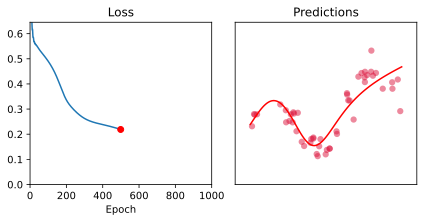

In [2]:
import matplotlib.pyplot as plt


def training_progress(epoch: int):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.2), dpi=300)

    # plot the losses up to the current epoch
    ax1.plot(losses[:epoch])
    # add a red dot to the current epoch
    ax1.scatter([(epoch - 1) % EPOCHS], [losses[epoch]], c="red", zorder=10)
    # set the limits and scale
    ax1.set_xlim(0, len(losses))
    ax1.set_ylim(0, max(losses[10:]))
    ax1.set_xlabel("Epoch")
    ax1.set_title("Loss")

    # plot the data
    ax2.scatter(X, y, linewidths=0, s=40, c="crimson", alpha=0.5)
    # plot the test predictions for the current epoch
    ax2.plot(Xtest, test_predictions[epoch], c="red")
    # set the limits and labels
    ax2.set_xlim(-1, 11)
    ax2.set_ylim(y.min() - 1, y.max() + 1)
    ax2.set_title("Predictions")
    ax2.set_xticks([])
    ax2.set_yticks([])

    plt.tight_layout()

%config InlineBackend.figure_format = "svg"

# plot the last frame to see how things lool
training_progress(EPOCHS // 2);


Make the gif, plotting every 15 epochs


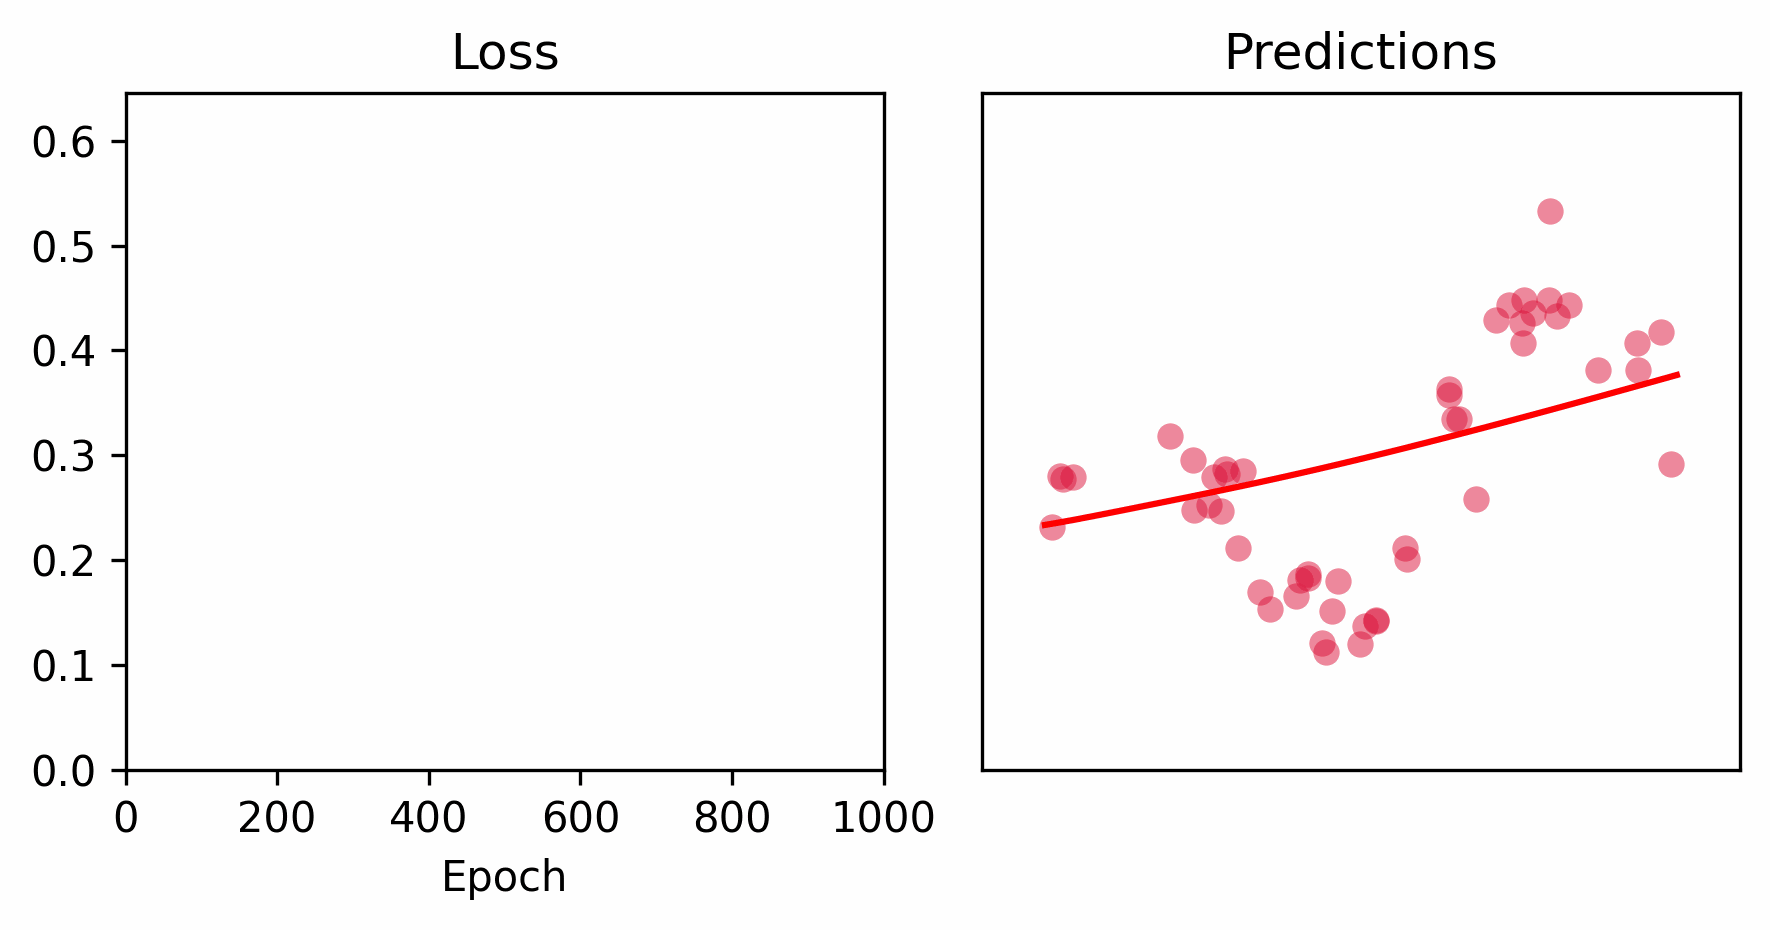

In [3]:
from make_a_gif import gif

gif(
    range(1, EPOCHS, 15),
    training_progress,
    fps=24,
    css={"width": "600px"},
    save_to="outputs/training_progress",
)